In [5]:
import talib as ta

In [6]:
import yfinance as yf
import pandas as pd

In [7]:
def get_stock_data_yf(code):
    df = yf.download("{}.T".format(code))
    return df

In [49]:
df = get_stock_data_yf('7043')

[*********************100%%**********************]  1 of 1 completed


In [50]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-11,2010.0,2235.0,1670.0,1705.0,1615.237427,3245000
2018-12-12,1800.0,1880.0,1685.0,1761.0,1668.289185,1907000
2018-12-13,1765.0,1944.0,1722.0,1834.0,1737.445801,1716200
2018-12-14,1803.0,1830.0,1665.0,1680.0,1591.553467,424300
2018-12-17,1655.0,1675.0,1458.0,1483.0,1404.925049,262300
...,...,...,...,...,...,...
2024-02-09,912.0,946.0,841.0,841.0,841.000000,99300
2024-02-13,861.0,991.0,836.0,991.0,991.000000,501100
2024-02-14,1020.0,1054.0,893.0,896.0,896.000000,510100


In [51]:
df['ATR14'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)

・買うべきか売るべきかは12期間
モメンタムオシレーターで決める
0以上は買い、0以下は売り

・移動平均20期間

・ケルトナーの初期設定は20期間、1.5

・ボリンジャの初期設定は20期間、2

In [52]:
df['SMA20'] = ta.SMA(df['Close'], timeperiod=20)

In [53]:
df['ATR20'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=20)
df['ATR20_U'] = df['SMA20'] + df['ATR20']*1.5
df['ATR20_L'] = df['SMA20'] - df['ATR20']*1.5

In [54]:
df['MOM'] = ta.MOM(df['Close'], timeperiod=12)
df['MOM_0'] = 0

In [55]:
df['BBU2'], _ , df['BBL2'] =ta.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

In [56]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,ATR14,SMA20,ATR20,ATR20_U,ATR20_L,MOM,MOM_0,BBU2,BBL2
Date,,,,,,,,,,,,,,,
2024-02-09,912.0,946.0,841.0,841.0,841.0,99300,82.270942,845.55,68.635855,948.503783,742.596217,58.0,0,1120.703394,570.396606
2024-02-13,861.0,991.0,836.0,991.0,991.0,501100,87.465875,861.25,72.954063,970.681094,751.818906,58.0,0,1131.939398,590.560602
2024-02-14,1020.0,1054.0,893.0,896.0,896.0,510100,92.718312,872.60,77.356359,988.634539,756.565461,3.0,0,1128.738556,616.461444
2024-02-15,891.0,913.0,870.0,900.0,900.0,100100,89.167004,883.90,75.638541,997.357812,770.442188,-143.0,0,1123.395219,644.404781
2024-02-16,912.0,912.0,864.0,869.0,869.0,29800,86.226504,893.65,74.256614,1005.034922,782.265078,-118.0,0,1113.218919,674.081081


In [62]:
import mplfinance as mpf
import datetime 
import japanize_matplotlib

In [60]:
cdf = df.tail(60)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ATR14', 'SMA20',
       'ATR20', 'ATR20_U', 'ATR20_L', 'MOM', 'MOM_0', 'BBU2', 'BBL2'],
      dtype='object')

C:\Users\hartm\AppData\Local\Temp\ipykernel_25108\2998948734.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppD

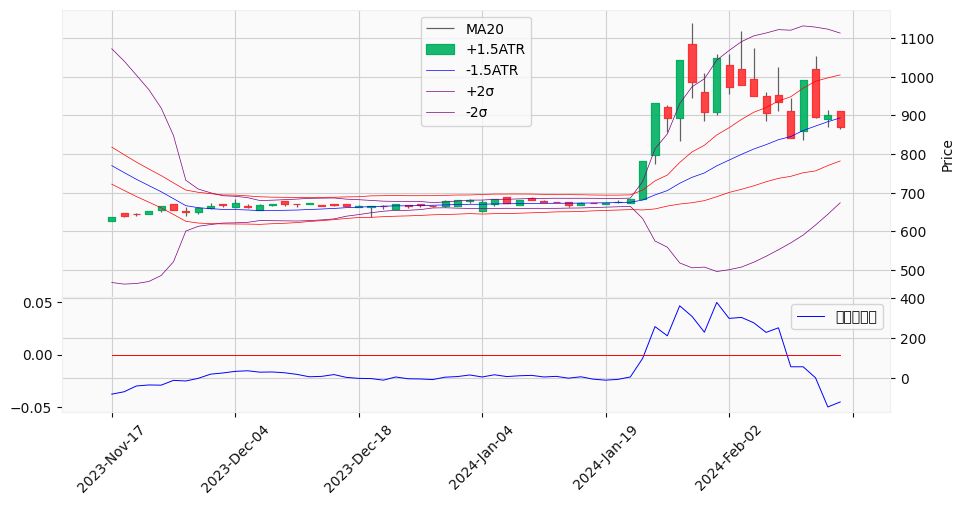

In [63]:
apd = [mpf.make_addplot(cdf["SMA20"], color="blue", width=0.5),
       mpf.make_addplot(cdf["BBU2"], color="purple", width=0.5),
       mpf.make_addplot(cdf["BBL2"], color="purple", width=0.5),
       mpf.make_addplot(cdf["ATR20_U"], color="red", width=0.5),
       mpf.make_addplot(cdf["ATR20_L"], color="red", width=0.5),
       mpf.make_addplot(cdf["MOM"], color="blue", panel=1 ,width=0.7),
       mpf.make_addplot(cdf["MOM_0"], color="red", panel=1 ,width=0.7)
       ]


fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True, style='yahoo')

axes[0].legend(["MA20", "+1.5ATR", "-1.5ATR","+2σ", "-2σ"])
axes[2].legend(["モメンタム"])

fig.show()

ピボット作成

P	（前日高値+前日安値+前日終値）÷3
R1	P×2-前日安値
R2	P+（前日高値-前日安値）
R3	R1+（前日高値-前日安値）
S1	P×2-前日高値
S2	P-（前日高値-前日安値）
S3	S1-（前日高値-前日安値）

In [1]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import talib as ta
import datetime as dt

In [4]:
df = yf.download('^N225')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0
...,...,...,...,...,...,...
2024-02-13,37248.359375,38010.691406,37184.101562,37963.968750,37963.968750,140500000
2024-02-14,37712.871094,37825.851562,37594.468750,37703.320312,37703.320312,120300000
2024-02-15,38017.828125,38188.738281,37935.359375,38157.941406,38157.941406,130000000


In [8]:
#P	（前日高値+前日安値+前日終値）÷3
df['P'] = (df['High'] + df['Low'] + df['High'])/3

# R1	P×2-前日安値
df['R1'] = df['P'] * 2 - df['Low']

# R2	P+（前日高値-前日安値）
df['R2'] = df['P'] + (df['High'] - df['Low'])

# R3	R1+（前日高値-前日安値）
df['R3'] = df['R1'] + (df['High'] - df['Low'])

# S1	P×2-前日高値
df['S1'] = df['P'] * 2 - df['High']

# S2	P-（前日高値-前日安値）
df['S2'] = df['P'] - (df['High'] - df['Low'])

# S3	S1-（前日高値-前日安値）
df['S3'] = df['S1'] - (df['High'] - df['Low'])

df

,Open,High,Low,Close,Adj Close,Volume,P,R1,R2,R3,S1,S2,S3
Date,,,,,,,,,,,,,
1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971
1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990
1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020
1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054
1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-13,37248.359375,38010.691406,37184.101562,37963.968750,37963.968750,140500000,37735.161458,38286.221354,38561.751302,39112.811198,37459.631510,36908.571615,36633.041667
2024-02-14,37712.871094,37825.851562,37594.468750,37703.320312,37703.320312,120300000,37748.723958,37902.979167,37980.106771,38134.361979,37671.596354,37517.341146,37440.213542
2024-02-15,38017.828125,38188.738281,37935.359375,38157.941406,38157.941406,130000000,38104.278646,38273.197917,38357.657552,38526.576823,38019.819010,37850.899740,37766.440104


In [19]:
cdf = df.tail(15)

C:\Users\hartm\AppData\Local\Temp\ipykernel_23668\4162179185.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppD

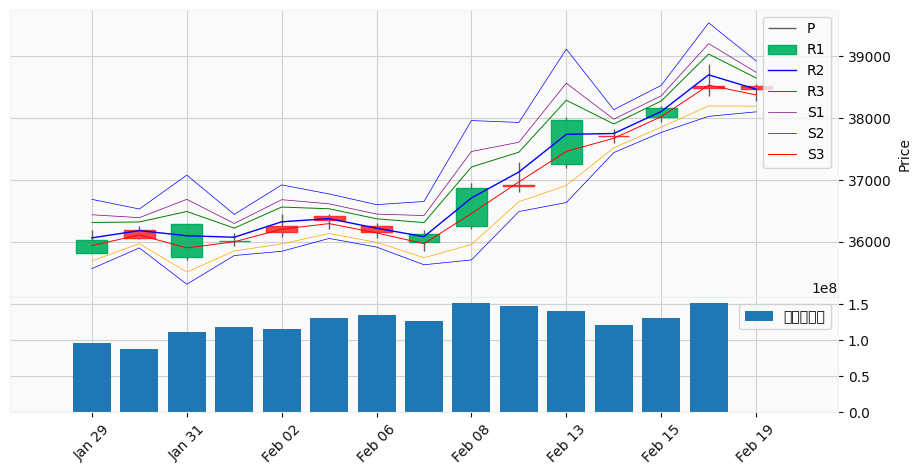

In [20]:
apd = [mpf.make_addplot(cdf["P"], color="blue", width=1),
       mpf.make_addplot(cdf["R1"], color="green", width=0.7),
       mpf.make_addplot(cdf["R2"], color="purple", width=0.5),
       mpf.make_addplot(cdf["R3"], color="blue", width=0.5),
       mpf.make_addplot(cdf["S1"], color="red", width=0.7),
       mpf.make_addplot(cdf["S2"], color="orange", width=0.5),
       mpf.make_addplot(cdf["S3"], color="blue", width=0.5),       
       mpf.make_addplot(cdf["Volume"], type='bar', panel=1)
       ]


fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True, style='yahoo')

axes[0].legend(["P", "R1", "R2","R3", "S1", "S2", "S3"])
axes[2].legend(["モメンタム"])

fig.show()

In [24]:
ddf = df.tail(1)
ddf

,Open,High,Low,Close,Adj Close,Volume,P,R1,R2,R3,S1,S2,S3
Date,,,,,,,,,,,,,
2024-02-19,38517.371094,38555.839844,38281.699219,38470.378906,38470.378906,0,38464.459635,38647.220052,38738.60026,38921.360677,38373.079427,38190.31901,38098.938802


In [53]:
#デイリーピボットに設定
df['P'] = ddf['P'].values[0]
df['R1'] = ddf['R1'].values[0]
df['R2'] = ddf['R2'].values[0]
df['R3'] = ddf['R3'].values[0]
df['S1'] = ddf['S1'].values[0]
df['S2'] = ddf['S2'].values[0]
df['S3'] = ddf['S3'].values[0]

cdf = df.tail(10)

C:\Users\hartm\AppData\Local\Temp\ipykernel_23668\4162179185.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\hartm\AppD

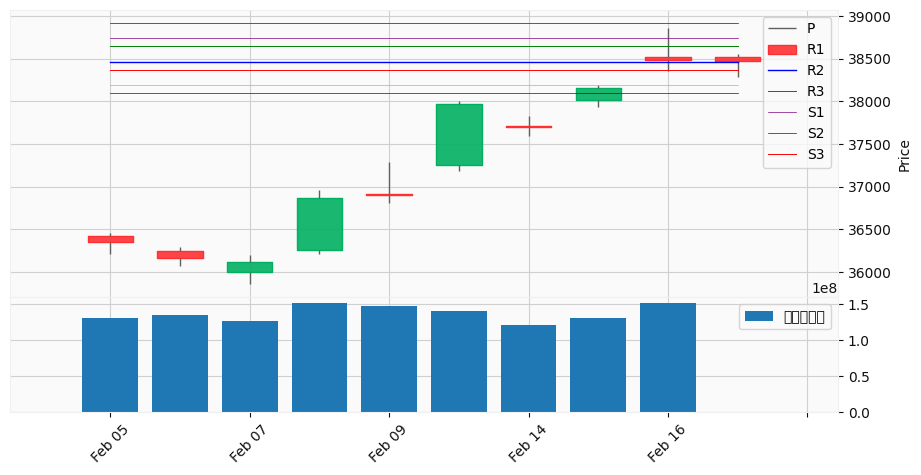

In [54]:
apd = [mpf.make_addplot(cdf["P"], color="blue", width=1),
       mpf.make_addplot(cdf["R1"], color="green", width=0.7),
       mpf.make_addplot(cdf["R2"], color="purple", width=0.5),
       mpf.make_addplot(cdf["R3"], color="blue", width=0.5),
       mpf.make_addplot(cdf["S1"], color="red", width=0.7),
       mpf.make_addplot(cdf["S2"], color="orange", width=0.5),
       mpf.make_addplot(cdf["S3"], color="blue", width=0.5),       
       mpf.make_addplot(cdf["Volume"], type='bar', panel=1)
       ]


fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True, style='yahoo')

axes[0].legend(["P", "R1", "R2","R3", "S1", "S2", "S3"])


fig.show()

２０日平均でピボット算出
ピボット　＝（２０日間の最安値＋２０日間の最高値＋終値）÷３
上限値（S1）＝　ピボット×２ー２０日間の最安値
下限値（B1）＝　ピボット×２ー２０日間の最高値


In [57]:
df['LoW_MIN20'] = df['Low'].rolling(20).min()
df['High_MIN20'] = df['Low'].rolling(20).max()


In [62]:
df['P20'] = (df['LoW_MIN20'] + df['High_MIN20'] + df['Close']) / 3
df['BUY'] = df['P20'] * 2 - df['LoW_MIN20']
df['SEL'] = df['P20'] * 2 - df['High_MIN20']

In [63]:
cdf = df.tail(30)

C:\Users\hartm\AppData\Local\Temp\ipykernel_23668\2912489722.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


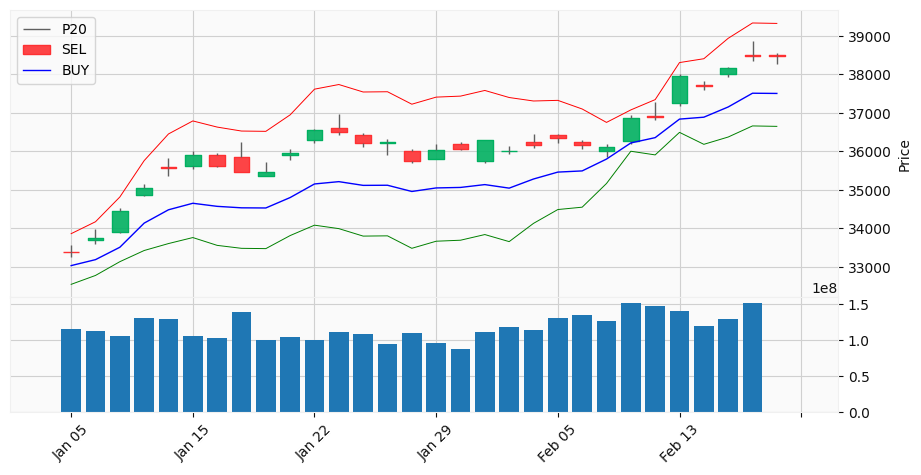

In [64]:
apd = [mpf.make_addplot(cdf["P20"], color="blue", width=1),
       mpf.make_addplot(cdf["SEL"], color="green", width=0.7),
       mpf.make_addplot(cdf["BUY"], color="red", width=0.7),       
       mpf.make_addplot(cdf["Volume"], type='bar', panel=1)
       ]


fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True, style='yahoo')

axes[0].legend(["P20", "SEL", "BUY"])

fig.show()
